In [1]:
import random as rd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x1','x2','c'])


In [3]:
dataset.head()

,x1,x2,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


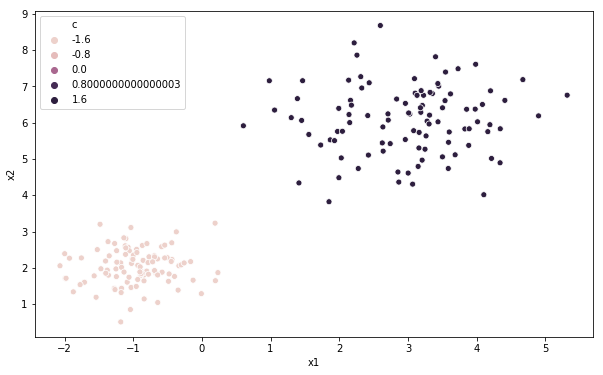

In [4]:
#plot the data
plt.figure(figsize=(10,6))
sns.scatterplot(x="x1",y="x2",hue="c",data=dataset)
plt.show()


<Figure size 720x432 with 0 Axes>

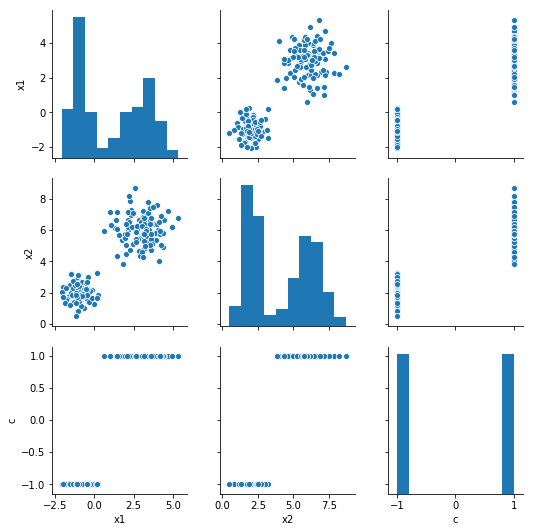

In [5]:
#lest do the pairplot to see how ou data is correleted
plt.figure(figsize=(10,6))
sns.pairplot(dataset)
plt.show()

In [10]:

alpha = .01

def sign(x):
    Y = np.zeros(x.shape)
    D = x > 0
    
    Y[D == False] = -1
    Y[D == True] = 1
    return Y

def gradient(y,x):
    return -1*np.matmul(y.T,x)

def perceptron(X,y):
    w = np.zeros((1+X.shape[1],1))
    X = np.hstack((np.ones((X.shape[0],1)),X))
    Y = sign(np.matmul(X,w))
    M = (Y.flatten()*y.flatten())==-1 
    Tr = y[M]
    while np.sum(M)>0:
        gr = gradient(Tr,X[M]).reshape(-1,1)
        w = w - alpha * gr
        Y = sign(np.matmul(X,w))
        M = ((Y.flatten()*y.flatten())==-1)  
        Tr = y[M]
        print("Misclassifications : ",np.sum(M))

    return w

In [11]:
w=perceptron(dataset[["x1","x2"]].values,dataset["c"].values)

Misclassifications :  100
Misclassifications :  92
Misclassifications :  30
Misclassifications :  11
Misclassifications :  7
Misclassifications :  4
Misclassifications :  3
Misclassifications :  3
Misclassifications :  3
Misclassifications :  3
Misclassifications :  3
Misclassifications :  3
Misclassifications :  3
Misclassifications :  3
Misclassifications :  2
Misclassifications :  2
Misclassifications :  2
Misclassifications :  1
Misclassifications :  0


In [9]:
w

array([[-1.75      ],
       [ 4.84026015],
       [ 0.25091696]])

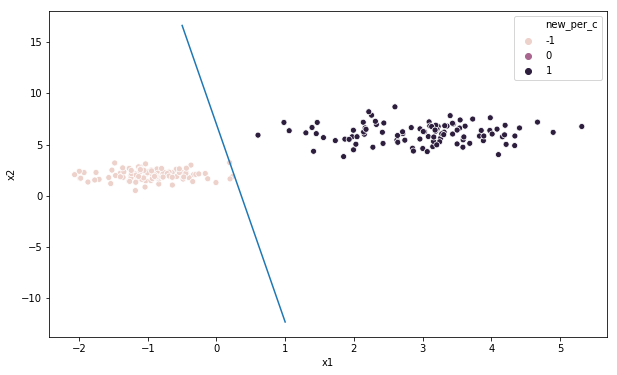

In [11]:
plt.figure(figsize=(10,6))
data = dataset[["x1","x2"]].values
data = np.hstack((np.ones((data.shape[0],1)),data))
y_pred = sign(np.matmul(data,w))
dataset["new_pt"] = y_pred
dataset["new_pt"] = dataset["new_pt"].apply(lambda x:int(x))
x = np.linspace(-.5,1,100)
y = -w[0]/w[2] - w[1]/w[2] * x
sns.scatterplot(x="x1",y="x2",hue="new_pt",data=dataset)
sns.lineplot(x=x,y=y,palette="Set2")


In [ ]:
dataset["new_pt"].value_counts()

In [13]:
dataset[["x1","x2"]]

,x1,x2
0,-0.334207,2.058738
1,3.264395,5.636814
2,-0.669884,1.856185
3,1.995284,4.484924
4,3.588041,4.739172
5,-1.988864,1.713443
6,2.835925,6.653662
7,-1.250864,1.971740
8,2.152984,6.004102
9,2.962082,5.537159
